In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Modified Lotka Volterra

In [14]:
def generate_LV(r, s, f, K, alpha, beta):
    dxdt = lambda x: r*x[0]*(1 - x[0]/K) - f*x[0] - alpha*x[0]*x[1]
    dydt = lambda x: (s-f)*x[1] + beta*x[0]*x[1]
    ddt = lambda t, x: np.array([dxdt(x), dydt(x)])
    
    return ddt


In [15]:
def steady_state(r, s, f, K, alpha, beta):
    x = (f - s) / beta
    y = (r * (1 - ((f - s) / (beta * K))) - f) / alpha

    return x, y

In [16]:
r = 0.8
s = -0.8
f = 0.1
alpha = 0.045
beta = 0.03
K = 1000

In [17]:
LV = generate_LV(r, s, f, K, alpha, beta)
x_star, y_star = steady_state(r, s, f, K, alpha, beta)
print(x_star, y_star)

30.000000000000004 15.022222222222224


## Solve IVP

In [18]:
x0 = np.array([50, 10])
from scipy.integrate import solve_ivp, odeint

In [19]:
sol = solve_ivp(fun=LV, y0=x0, t_span=(0, 100), method='RK45')

In [20]:
t = sol['t']
x, y = sol['y']

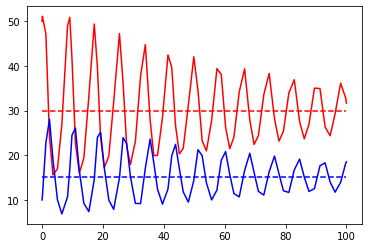

In [21]:
plt.plot(t, x, label='fish', c='r')
plt.plot(t, y, label='sharks', c='b')
plt.hlines(x_star, xmin=t[0], xmax=t[-1], colors='r', ls='--')
plt.hlines(y_star, xmin=t[0], xmax=t[-1], colors='b', ls='--')